Data columns: ['step', 'epoch', 'loss', 'eval_loss']

First 5 rows:
   step     epoch    loss  eval_loss
0     0       NaN     NaN   1.369526
1     0       NaN     NaN   1.369526
2    10  0.010997  1.3375        NaN
3    10  0.010997     NaN   1.363554
4    20  0.021993  1.2910        NaN


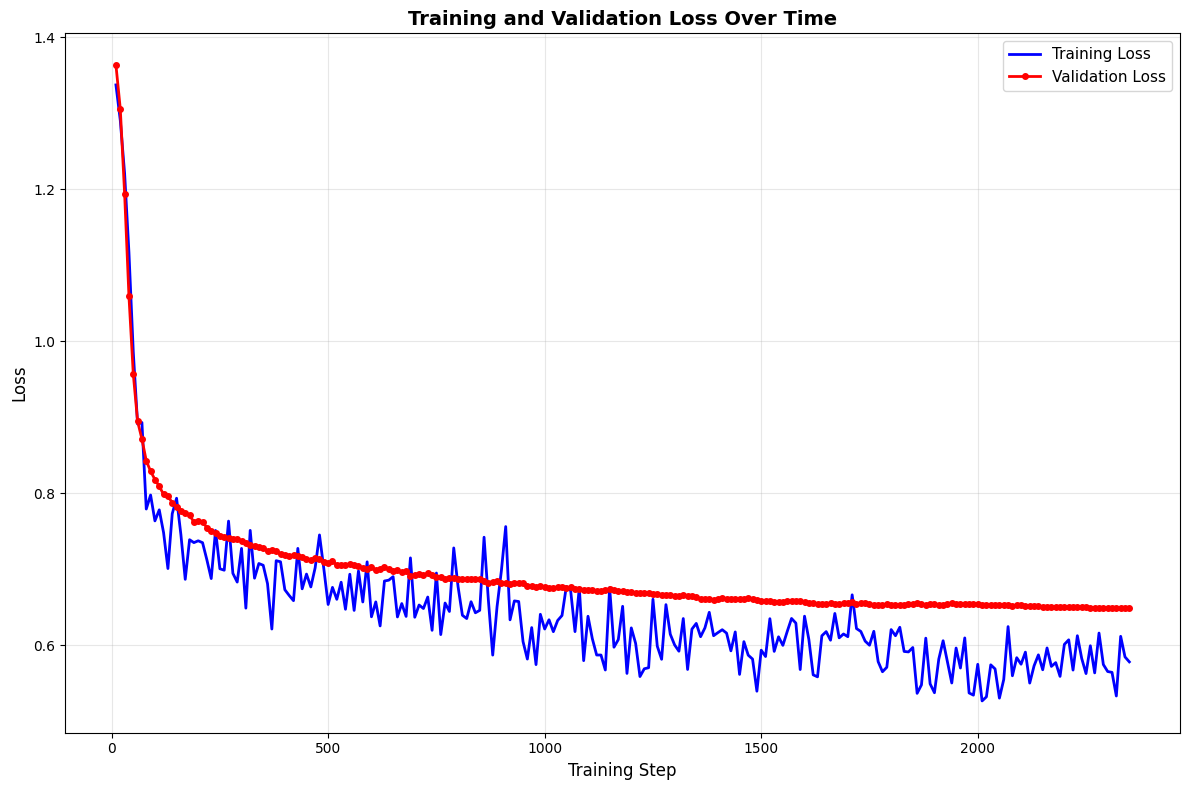

Validation Loss - Min: 0.6494, Max: 1.3695


In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the training log data
df = pd.read_csv('./baseline/lora-llama2-r8/training_log.csv')

# Display the first few rows to understand the data structure
print("Data columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Create the plot
plt.figure(figsize=(12, 8))

# Plot training loss
if 'loss' in df.columns:
    plt.plot(df['step'][2::2], df['loss'][2::2], label='Training Loss', color='blue', linewidth=2)

# Plot validation loss
if 'eval_loss' in df.columns:
    plt.plot(df['step'][3::2], df['eval_loss'][3::2], label='Validation Loss', color='red', linewidth=2, marker='o', markersize=4)

# Customize the plot
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Loss', fontsize=12)
#plt.ylim(top=0.3, bottom=0.1)
plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
if 'train_loss' in df.columns:
    print(f"\nTraining Loss - Min: {df['train_loss'].min():.4f}, Max: {df['train_loss'].max():.4f}")
if 'eval_loss' in df.columns:
    print(f"Validation Loss - Min: {df['eval_loss'].min():.4f}, Max: {df['eval_loss'].max():.4f}")

Data columns: ['step', 'epoch', 'loss', 'eval_loss']

First 5 rows:
   step     epoch    loss  eval_loss
0     0       NaN     NaN   0.810855
1     0       NaN     NaN   0.810855
2    20  0.021993  0.7933        NaN
3    20  0.021993     NaN   0.795051
4    40  0.043986  0.7527        NaN


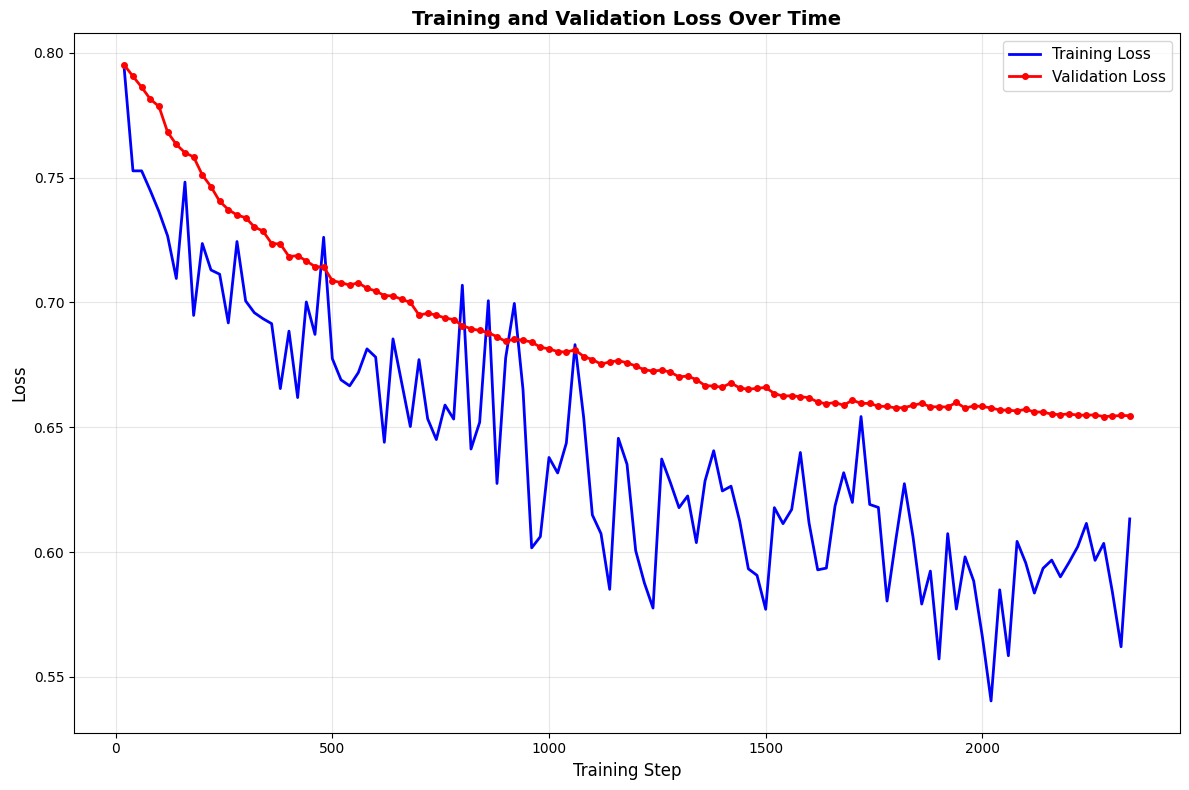

Validation Loss - Min: 0.6543, Max: 0.8109


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the training log data
df = pd.read_csv('./fusion/lora-llama2-r8/best.csv')

# Display the first few rows to understand the data structure
print("Data columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Create the plot
plt.figure(figsize=(12, 8))

# Plot training loss
if 'loss' in df.columns:
    plt.plot(df['step'][2::2], df['loss'][2::2], label='Training Loss', color='blue', linewidth=2)

# Plot validation loss
if 'eval_loss' in df.columns:
    plt.plot(df['step'][3::2], df['eval_loss'][3::2], label='Validation Loss', color='red', linewidth=2, marker='o', markersize=4)

# Customize the plot
plt.xlabel('Training Step', fontsize=12)
plt.ylabel('Loss', fontsize=12)
#plt.ylim(top=0.3, bottom=0.1)
plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
if 'train_loss' in df.columns:
    print(f"\nTraining Loss - Min: {df['train_loss'].min():.4f}, Max: {df['train_loss'].max():.4f}")
if 'eval_loss' in df.columns:
    print(f"Validation Loss - Min: {df['eval_loss'].min():.4f}, Max: {df['eval_loss'].max():.4f}")

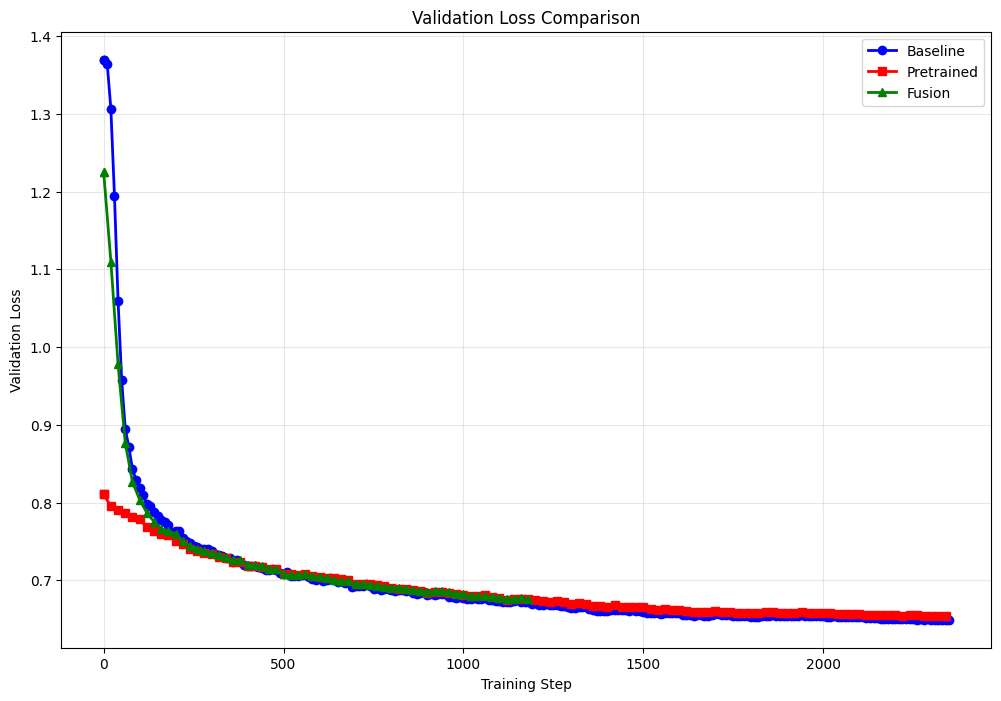

In [ ]:
df_baseline = pd.read_csv('./baseline/lora-llama2-r8/training_log.csv')
df_best = pd.read_csv('./fusion/lora-llama2-r8/best.csv')
df_fusion = pd.read_csv('./fusion/lora-llama2-r8/training_log.csv')

# Plot comparison
plt.figure(figsize=(12, 8))

# Baseline validation loss
baseline_val = df_baseline.dropna(subset=['eval_loss'])
plt.plot(baseline_val['step'], baseline_val['eval_loss'], 'b-o', label='Baseline', linewidth=2)

best_val = df_best.dropna(subset=['eval_loss'])
plt.plot(best_val['step'], best_val['eval_loss'], 'r-s', label='Pretrained', linewidth=2)

# Fusion validation loss
fusion_val = df_fusion.dropna(subset=['eval_loss'])
plt.plot(fusion_val['step'], fusion_val['eval_loss'], 'g-^', label='Fusion', linewidth=2)

plt.xlabel('Training Step')
plt.ylabel('Validation Loss')
#plt.ylim(top=1)
#plt.xlim(left=-3, right=300)
#plt.xlim(left=700, right=800)
plt.title('Validation Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()